**Author**: CodeForAll  
**License**: MIT License

--- 


# 📘 Lead and Lag Compensators in Control Systems

## 🎯 Purpose

Lead and Lag compensators are used to improve control system performance by adjusting transient response, stability, and steady-state error.

---

## 🔷 Lead Compensator

### 💡 Goal:
- Improve **transient response** (faster rise time)
- Increase **phase margin**
- Potentially reduce overshoot

### 📐 Transfer Function:

$$
C_{\text{lead}}(s) = K \cdot \frac{s + z}{s + p}, \quad \text{where } z < p
$$

- $z$: Zero location
- $p$: Pole location
- $K$: Gain

### 🧠 Behavior:
- Adds **positive phase** around a chosen frequency
- Makes system faster but can increase overshoot if not tuned properly

---

## 🔶 Lag Compensator

### 💡 Goal:
- Reduce **steady-state error**
- Improve **accuracy** (better tracking)
- Adds minimal effect to transient response

### 📐 Transfer Function:

$$
C_{\text{lag}}(s) = K \cdot \frac{s + z}{s + p}, \quad \text{where } z > p
$$

- $z$: Zero (closer to origin than lead)
- $p$: Pole (very close to $z$)
- $K$: Gain

### 🧠 Behavior:
- Increases **low-frequency gain**
- Adds **negative phase**, so tuning must be careful

---

## 🛠️ Design Tips

| Feature              | Lead                          | Lag                           |
|----------------------|-------------------------------|-------------------------------|
| Speed (Rise Time)    | ✅ Improves                   | ❌ Little impact              |
| Phase Margin         | ✅ Increases                  | ❌ May reduce slightly        |
| Steady-State Error   | ❌ Not improved               | ✅ Significantly improved     |
| Risk                 | ⚠️ Can cause overshoot        | ⚠️ Can make system slow       |

---

## ✅ Combined Use

Sometimes a **Lead-Lag compensator** is used to balance both fast response and steady-state accuracy:

$$
C(s) = K \cdot \frac{(s + z_1)(s + z_2)}{(s + p_1)(s + p_2)}
$$

- First pair: Lead (for speed)
- Second pair: Lag (for accuracy)

---

## 📈 Conclusion

- **Use Lead** when we need to speed up the system and improve stability.
- **Use Lag** when we care more about long-term accuracy and tracking.
- Tune pole-zero positions and gain carefully to avoid instability or sluggishness.



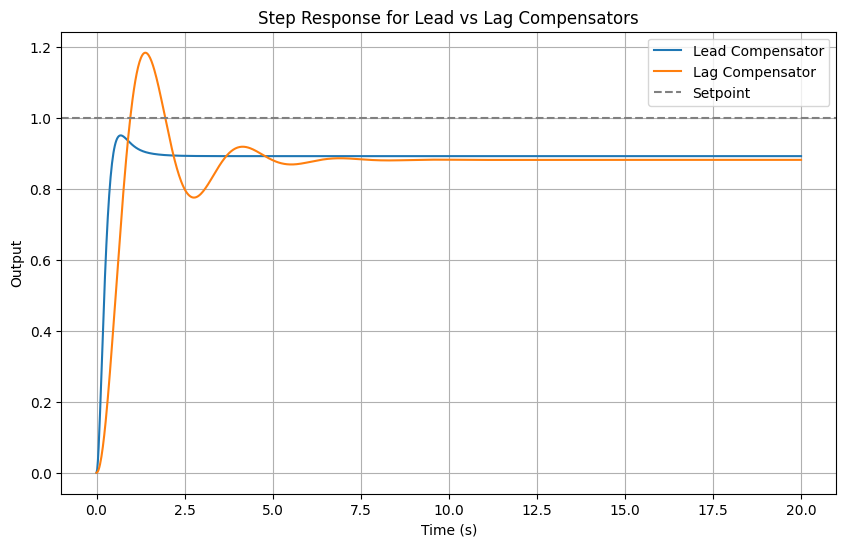

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Define the second-order plant: G(s) = 1 / (s^2 + 2s + 1)
num = [1]
den = [1, 2, 1]
plant = ctrl.tf(num, den)

# Lead compensator: C(s) = (s + 2) / (s + 10)
# Increase gain to ensure system reaches setpoint
C_lead = 50 * ctrl.tf([1, 2], [1, 12])


# Lag compensator: C(s) = (s + 0.1) / (s + 0.01)
# Increase gain slightly for better steady-state tracking
C_lag = 5 * ctrl.tf([1, 1.5], [1, 1])

# Closed-loop transfer functions
T_lead = ctrl.feedback(C_lead * plant, 1)
T_lag = ctrl.feedback(C_lag * plant, 1)

# Time vector for simulation (increased time for better response)
t = np.linspace(0, 20, 1000) 

# Step responses
t1, y_lead = ctrl.step_response(T_lead, t)
t2, y_lag = ctrl.step_response(T_lag, t)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t1, y_lead, label='Lead Compensator')
plt.plot(t2, y_lag, label='Lag Compensator')
plt.axhline(1, color='gray', linestyle='--', label='Setpoint')
plt.title('Step Response for Lead vs Lag Compensators')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()
